
# Comments on what this notebook does:

# WARNING:

For the script to work the data files must be positiong in the data path of the repository. 
Or the path to the data must be adapted accordingly. In this script all csv data must be in data_path 

# The data which is used here has received the following steps already 

* mapping of entries in countrys, and companies and so on, see Andreas notebooks 

* only unique values remains in columns which are categorical 

# The process steps which will be done in here:**

 * Bla bla 
 

# Import Libraries

In [17]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 
import pyarrow.parquet as pq

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")


## Retrieving Data, deleting empty entries, Save dfs in callable variables

In [18]:
# Loading data of the combined french datasets 

# Path to the neighbouring 'data' folder
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','data'))

# Check path
print(data_path + '/EU_all_current_shared.parquet')

# Load csv data
table = pq.read_table(os.path.join(data_path, 'EU_all_current_shared.parquet'))

# In pandas DataFrame umwandeln
data_all = table.to_pandas()

# Show head to be sure 
print(data_all.head())

/Users/tillo/Repositoriums/aug24_bds_int---co2/data/EU_all_current_shared.parquet
         ID Country  VFN              Mp              Mh  \
0  280060.0      UK  NaN             NaN         UNKNOWN   
1  280060.0      UK  NaN             NaN         AUDI AG   
2  280060.0      PL  NaN     VW GROUP PC      VOLKSWAGEN   
3  280060.0      HU  NaN             NaN  HYUNDAI ASSAN    
4  280060.0      HU  NaN  GENERAL MOTORS            OPEL   

                                Man       MMS                  Tan  \
0                           UNKNOWN  VAUXHALL                  NaN   
1                               NaN      AUDI                  NaN   
2                     VOLKSWAGEN AG       NaN  e1*2001/116*0211*27   
3  HYUNDAI ASSAN OTOMOTIV SANAYI VE   Hyundai  e11*2007/46*0192*04   
4                      ADAM OPEL AG      Opel   e1*2007/46*0374*14   

             T       Va  ...  De  Vf Status    year Date of registration  \
0  A-H/MONOCAB     BF11  ... NaN NaN      P  2010.0         

In [19]:
data_all.head()
print(data_all.columns)
data_all.shape

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'ech', 'RLFI', 'Electric range (km)',
       '#identical occurences'],
      dtype='object')


(14442792, 41)

# Define function to filter for missing values (coming from andreas notebook)

In [20]:
def count_missing_values(df):
    missing_counts = {}
    
    for col in df.columns:
        # Count pd.NA and np.nan separately
        pd_na_count = df[col].isna().sum() if df[col].dtype.name == 'category' else 0
        np_nan_count = df[col].isna().sum() if df[col].dtype.name == 'float32' else 0
        
        # Store the results
        missing_counts[col] = {'pd.NA': pd_na_count,
                               'np.nan': np_nan_count,
                               'Dtype': df[col].dtype.name,
                               'Percent Missing': f"{df[col].isna().sum() / len(df[col]) * 100:.2f}%"
}

    
    # Convert the results to a DataFrame for easier viewing
    result_df = pd.DataFrame(missing_counts).T
    return result_df

In [21]:
# Count and display the missing values
result = count_missing_values(data_all)
print(result)

                          pd.NA    np.nan     Dtype Percent Missing
ID                            0         0   float32           0.00%
Country                       0         0  category           0.00%
VFN                     6022343         0  category          41.70%
Mp                      1538457         0  category          10.65%
Mh                            0         0  category           0.00%
Man                      310768         0  category           2.15%
MMS                     6048284         0  category          41.88%
Tan                      490543         0  category           3.40%
T                         62037         0  category           0.43%
Va                       100484         0  category           0.70%
Ve                       225223         0  category           1.56%
Mk                        42908         0  category           0.30%
Cn                        49370         0  category           0.34%
Ct                        24710         0  categ

## Filter out all data that has no explanatory variable 

Filter out all data that is later then 2015 VW Diesel Scandal 

In [22]:
count_not_nan = data_all['Electric range (km)'].notna().sum()

print(f"Anzahl der Zeilen mit vorhandenem Wert in 'Electric range (km)': {count_not_nan}")

count_not_nan2 = data_all['Enedc (g/km)'].notna().sum()

print(f"Anzahl der Zeilen mit vorhandenem Wert in 'Enedc (g/km)': {count_not_nan2}")

count_not_nan3 = data_all['Ewltp (g/km)'].notna().sum()

print(f"Anzahl der Zeilen mit vorhandenem Wert in 'Ewltp (g/km)': {count_not_nan3}")

count_both_not_nan = data_all[data_all['Enedc (g/km)'].notna() & data_all['Ewltp (g/km)'].notna()].shape[0]
print(f"Anzahl der Zeilen mit vorhandenem Wert in 'Enedc (g/km)' und 'Ewltp (g/km)': {count_both_not_nan}")

Anzahl der Zeilen mit vorhandenem Wert in 'Electric range (km)': 1094995
Anzahl der Zeilen mit vorhandenem Wert in 'Enedc (g/km)': 8976101
Anzahl der Zeilen mit vorhandenem Wert in 'Ewltp (g/km)': 10877194
Anzahl der Zeilen mit vorhandenem Wert in 'Enedc (g/km)' und 'Ewltp (g/km)': 5759672


In [29]:
# Delete all rows which have no informat on the target variable or are not an electric car 
df_cleaned = data_all.dropna(subset=['Enedc (g/km)', 'Ewltp (g/km)', 'Electric range (km)', 'Ernedc (g/km)', 'Erwltp (g/km)'], how='all')

df_cleaned.head()
df_cleaned.info()

# Count and display the missing values
print(count_missing_values(df_cleaned))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14097837 entries, 0 to 14442791
Data columns (total 41 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     float32 
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      float32 
 16  m (kg)                 float32 
 17  Mt                     float32 
 18  Enedc (g/km)           float32 
 19  Ewltp (g/km)           float32 
 20  W (mm)                 float32 
 21  At1 (mm)               float3

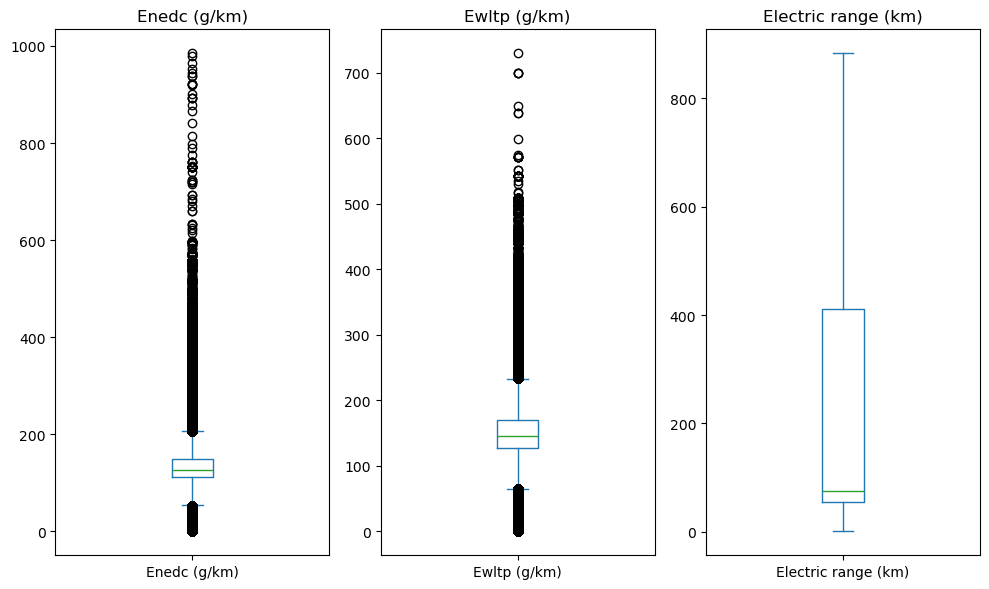

In [26]:
# Make Boxplot of the 3 variables to get an overview 

# Create boxplots for the desired columns using df_cleaned
plt.figure(figsize=(10, 6))

# Boxplot for Enedc (g/km)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
df_cleaned['Enedc (g/km)'].plot(kind='box')
plt.title('Enedc (g/km)')

# Boxplot for Ewltp (g/km)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
df_cleaned['Ewltp (g/km)'].plot(kind='box')
plt.title('Ewltp (g/km)')

# Boxplot for Electric range (km)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
df_cleaned['Electric range (km)'].plot(kind='box')
plt.title('Electric range (km)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [27]:
# Filter for year 
# Filter rows where year is 2016 or greater
df_cleaned_year = df_cleaned[df_cleaned['year'] >= 2016]


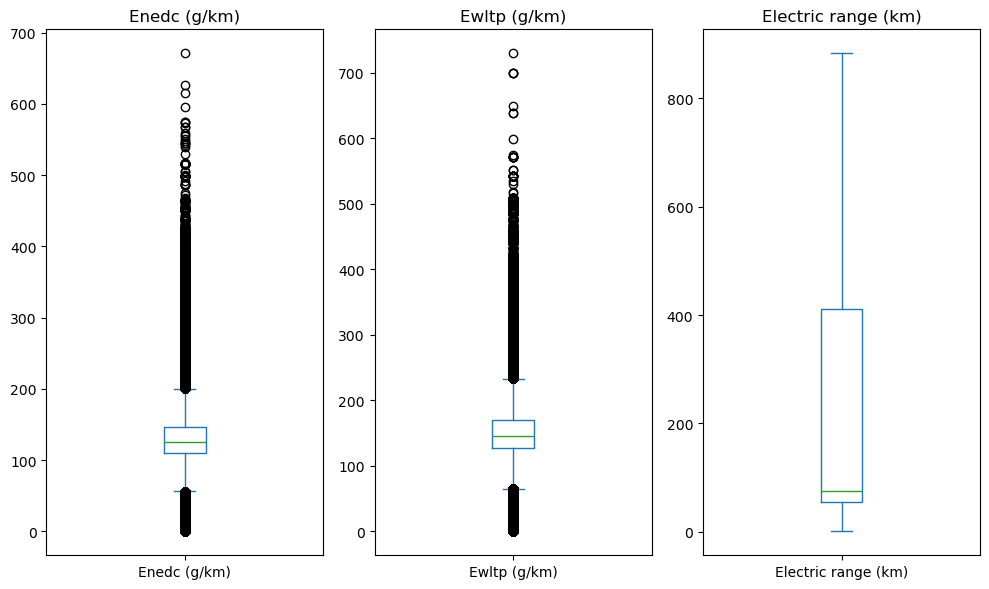

In [28]:
# Create boxplots for the desired columns using df_cleaned_year
plt.figure(figsize=(10, 6))

# Boxplot for Enedc (g/km)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st plot
df_cleaned_year['Enedc (g/km)'].plot(kind='box')
plt.title('Enedc (g/km)')

# Boxplot for Ewltp (g/km)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd plot
df_cleaned_year['Ewltp (g/km)'].plot(kind='box')
plt.title('Ewltp (g/km)')

# Boxplot for Electric range (km)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd plot
df_cleaned_year['Electric range (km)'].plot(kind='box')
plt.title('Electric range (km)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Takeaway To-Dos from Group Meeting: 

- Make My own data frame 
- Take only data that contains EWltp values 
- Take only data year = 2016 and younger (2017 , 2018...)
- Look for duplicates in the Type variables called: TVV, VHF, TAN 
- look for varianze among same of these type variables of the other variables   

- if there is one that has minimum varianz -> take that and unify these 
- make new variable called appearance in EU data, or R 

-> that would be my EU_Dataframe 

# Next Possible Working steps 

Filter out all data that has no explanatory variable 

Filter out all data that is later then 2015 oder wann auch immer diese EU gesetzes änderung und der Gas Skandal war 
(siehe Report)

Try to find eindeutige Beschreibungs nummer eines autos 

Try to find overlay with the Adame Data Frame 

Immer noch die Frage wo ist der Entscheidenden Punkt der Correlation ? 

Hier nochmal danach eine Correlation Maxtrix Ausgeben und Nochmal den Data Audit ansehen, was die Columns zu bedeuten haben 

Explore TVV Combination: Investigate whether we should combine the TVV (Type, Variant, Version) into a single variable, and decide on a common approach.

Outlier Handling: Implement or refine outlier detection and removal in the dataset, ensuring it's properly applied across notebooks.

Analyze the 'R' Column: Further explore the "R" column, especially for values after 2020 where all "R" values equal one. Include this for discussion in the next meeting.

